# Example Portfolio Analysis


In [1]:
%load_ext autoreload
%autoreload 2

# !pip install nb_black
%load_ext nb_black

&lt;IPython.core.display.Javascript object&gt;

In [2]:
import sys

sys.path.append("..")

&lt;IPython.core.display.Javascript object&gt;

In [41]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("../assets/ppt.mplstyle")

import seaborn as sns
from utils import print_properties

from ppt.portfolio_value import Portfolio

&lt;IPython.core.display.Javascript object&gt;

<a id='ld'></a>
## Load Data

Initialising the `Portfolio` object will load the input data, download the relevant stock prices and calculate some initial stats on the portfolio.

The default location for the input file is `../data/raw/purchase_info.csv` however, you can specify your own location using the optional `input_data_source` argument.

In [4]:
# initiate Portfolio object
pf = Portfolio()

# add a SNP500 benchmark
pf.add_benchmark("^GSPC")

# print available properties
print_properties(pf)

add_benchmark
benchmark
cash
daily_stock_prices_local_currency
daily_stock_prices_usd
datetime_index
input_data_source
portfolio_value_usd
positions
profit
start_date
stock_metadata
stocks
tickers


&lt;IPython.core.display.Javascript object&gt;

## High level analysis

Now you have access to all the raw underlying stock price data and the daily running totals of the overall portfolio and each individual position. We can quickly plot the value of the portfolio over time and the running profit (portfolio value minus cash injections).


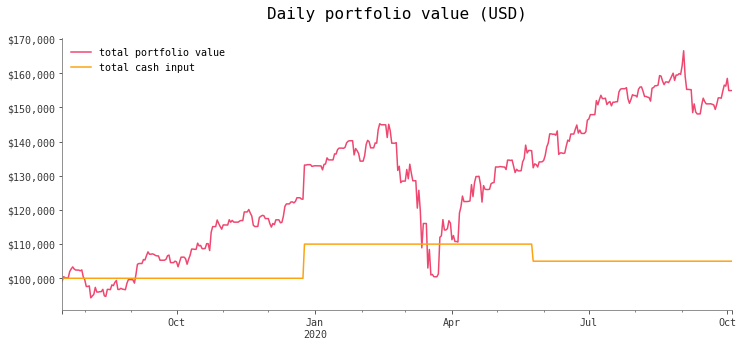

&lt;IPython.core.display.Javascript object&gt;

In [27]:
mpl.style.use("../assets/ppt.mplstyle")
# show the daily portfolio value including cash injections
pf.portfolio_value_usd.plot(label="total portfolio value")
pf.cash.cash_flows["external_cashflows"].plot(label="total cash input")
plt.title("Daily portfolio value (USD)")
plt.xlabel(None)
plt.gca().get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter("${x:,.0f}"))
plt.legend()
plt.show()

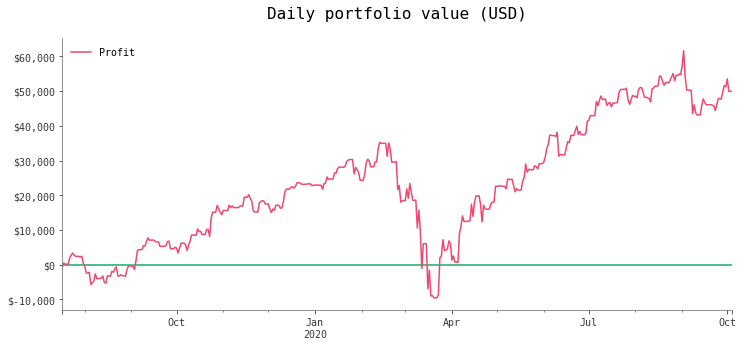

&lt;IPython.core.display.Javascript object&gt;

In [28]:
# show the running profit (portfolio value minus cash injections)
pf.profit.plot(label="Profit")
plt.title("Running Profit (USD)")
plt.gca().get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter("${x:,.0f}"))
plt.hlines(y=0, xmin=pf.datetime_index[0], xmax=pf.datetime_index[-1], color="#0EAD69")
plt.legend()
plt.show()

## Individual Stock Analysis

**Historical correlations (since start of portfolio)**

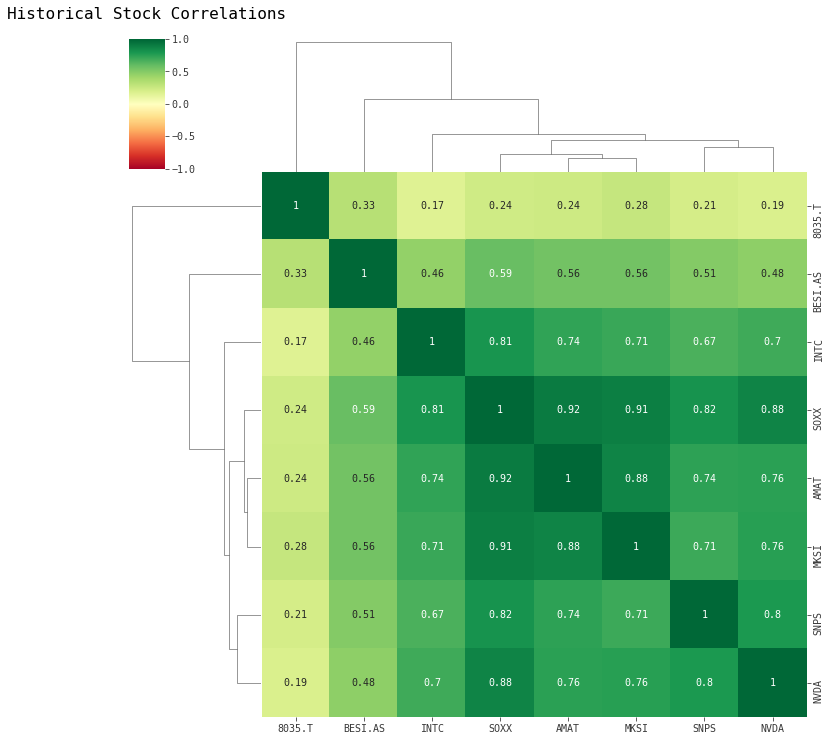

&lt;IPython.core.display.Javascript object&gt;

In [45]:
stock_prices = pf.daily_stock_prices_local_currency
returns = stock_prices.to_log_returns()

sns.clustermap(returns.corr(), cmap="RdYlGn", vmin=-1, vmax=1, annot=True)
plt.title("Historical Stock Correlations")
plt.show()

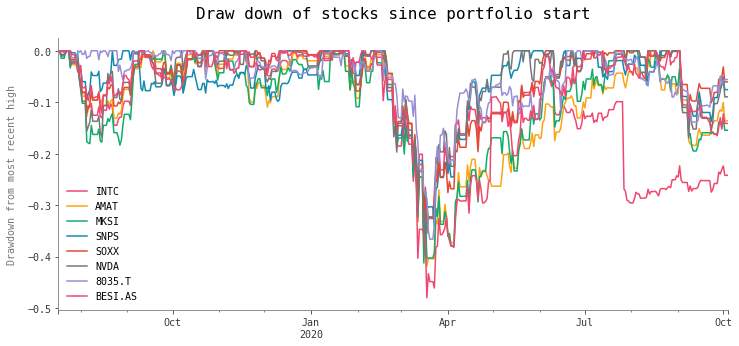

&lt;IPython.core.display.Javascript object&gt;

In [48]:
stock_values = pf.daily_stock_prices_usd
stock_values.to_drawdown_series().plot()

plt.title("Draw down of stocks since portfolio start")
plt.ylabel("Drawdown from most recent high")
plt.show()

**TODO: More indepth analysis. Callibrate returns for time-weighted returns to accoutn for additional buy/selling**